# Predicting Time to Adoption at Animal Shelter

In [3]:
# Import the pandas library and the data
import pandas as pd
shelter_df = pd.read_csv('Animal_Shelter_Intake_and_Outcome.csv')

# Show the first few rows of the data
shelter_df.head()

,Name,Type,Breed,Breed_Corrected,Color,Color_Corrected,Sex,Size,Date Of Birth,Impound Number,...,Outcome Type,Outcome Subtype,Intake Condition,Outcome Condition,Intake Jurisdiction,Outcome Jurisdiction,Outcome Zip Code,Location,Count,Zip Codes
0,NaN,OTHER,CHICKEN,CHICKEN,BROWN,BROWN,Female,SMALL,NaN,K23-046471,...,ADOPTION,REFERRAL-O,UNKNOWN,PENDING,COUNTY,COUNTY,95403.0,"95403(38.4716444, -122.7398255)",0,26076.0
1,CUPCAKE,DOG,MALTESE/POODLE TOY,MALTESE,WHITE,WHITE,Spayed,TOY,10/6/2014,K23-045263,...,ADOPTION,SCAS WEB,UNKNOWN,PENDING,SANTA ROSA,COUNTY,95441.0,"95441(38.70854, -122.90737)",1,23750.0
2,*DEEDEE,CAT,DOMESTIC SH,DOMESTIC SH,BRN TABBY/TORTIE,BRN TABBY,Spayed,KITTN,7/20/2023,K23-046144,...,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,COUNTY,*WINDSOR,95492.0,"95492(38.541355, -122.80026)",1,31428.0
3,*MINDY,CAT,DOMESTIC MH,DOMESTIC MH,BRN TABBY,BRN TABBY,Spayed,SMALL,8/9/2023,K23-045723,...,ADOPTION,SCAS WEB,HEALTHY,HEALTHY,SANTA ROSA,*WINDSOR,95492.0,"95492(38.541355, -122.80026)",1,31428.0
4,*STING,CAT,DOMESTIC SH,DOMESTIC SH,BRN TABBY,BRN TABBY,Neutered,KITTN,7/29/2023,K23-045841,...,ADOPTION,WESTFARM,UNKNOWN,HEALTHY,SANTA ROSA,SANTA ROSA,95404.0,"95404(38.44511, -122.708)",1,26077.0


In [4]:
# Display how many NaN values exist in each column
shelter_df.isna().sum()

Name                    62
Type                     0
Breed                    0
Breed_Corrected          0
Color                    0
Color_Corrected          0
Sex                      0
Size                     1
Date Of Birth           76
Impound Number           0
Kennel Number            0
Animal ID                0
Intake Date              0
Outcome Date             0
Days in Shelter          0
Intake Type              0
Intake Subtype           0
Outcome Type             0
Outcome Subtype          2
Intake Condition         0
Outcome Condition        0
Intake Jurisdiction      0
Outcome Jurisdiction    21
Outcome Zip Code         1
Location                 1
Count                    0
Zip Codes                1
dtype: int64

In [5]:
# Drop all NaN rows
shelter_df = shelter_df.dropna()

(array([146., 338., 368., 252., 127., 103.,  65.,  38.,  28.,  16.,  14.,
         12.,   8.,   8.,   6.,   3.,   6.,   2.,   4.,   2.,   3.,   1.,
          0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   1.,   0.,   0.,   0.,   1.]),
 array([  0.  ,  13.35,  26.7 ,  40.05,  53.4 ,  66.75,  80.1 ,  93.45,
        106.8 , 120.15, 133.5 , 146.85, 160.2 , 173.55, 186.9 , 200.25,
        213.6 , 226.95, 240.3 , 253.65, 267.  , 280.35, 293.7 , 307.05,
        320.4 , 333.75, 347.1 , 360.45, 373.8 , 387.15, 400.5 , 413.85,
        427.2 , 440.55, 453.9 , 467.25, 480.6 , 493.95, 507.3 , 520.65,
        534.  ]),
 <BarContainer object of 40 artists>)

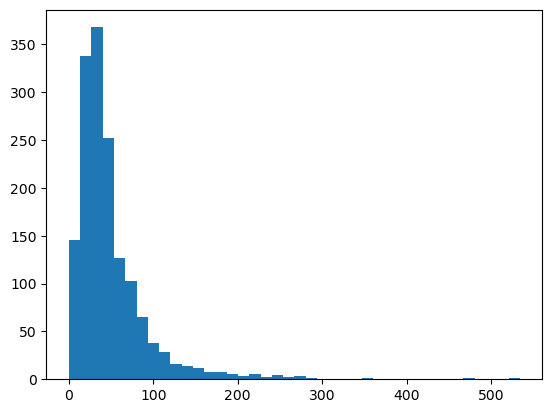

In [6]:
# import matplotlib and show histogram of Days in Shelter
import matplotlib.pyplot as plt

plt.hist(shelter_df['Days in Shelter'], bins=40)

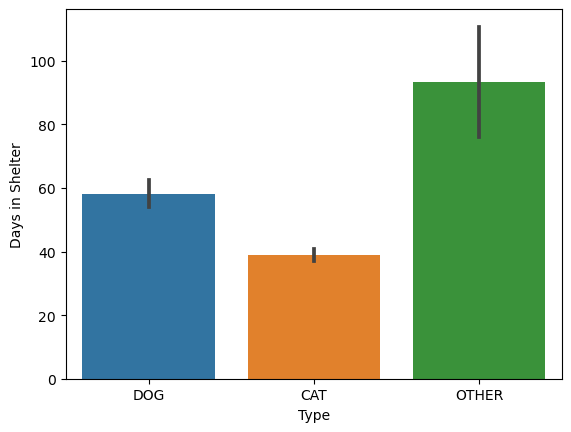

In [7]:
# Show bar plot of Days in Shelter by Type and import seaborn package
import seaborn as sns
p = sns.barplot(x=shelter_df['Type'], y=shelter_df['Days in Shelter'])

In [8]:
# Remove all unnecessary columns
shelter_df = shelter_df.drop(['Name','Impound Number','Kennel Number','Animal ID','Outcome Date','Intake Subtype',
                             'Outcome Type','Outcome Subtype','Outcome Condition','Outcome Jurisdiction',
                              'Intake Jurisdiction','Outcome Zip Code','Location','Count','Zip Codes'], axis = 1)

shelter_df.head() # 11 features

,Type,Breed,Breed_Corrected,Color,Color_Corrected,Sex,Size,Date Of Birth,Intake Date,Days in Shelter,Intake Type,Intake Condition
1,DOG,MALTESE/POODLE TOY,MALTESE,WHITE,WHITE,Spayed,TOY,10/6/2014,7/5/2023,34,STRAY,UNKNOWN
2,CAT,DOMESTIC SH,DOMESTIC SH,BRN TABBY/TORTIE,BRN TABBY,Spayed,KITTN,7/20/2023,10/17/2023,32,OWNER SURRENDER,HEALTHY
3,CAT,DOMESTIC MH,DOMESTIC MH,BRN TABBY,BRN TABBY,Spayed,SMALL,8/9/2023,8/16/2023,94,STRAY,HEALTHY
4,CAT,DOMESTIC SH,DOMESTIC SH,BRN TABBY,BRN TABBY,Neutered,KITTN,7/29/2023,8/29/2023,80,STRAY,UNKNOWN
6,CAT,DOMESTIC SH,DOMESTIC SH,ORG TABBY/WHITE,ORG TABBY,Spayed,KITTN,5/7/2023,5/30/2023,70,STRAY,UNKNOWN


In [9]:
# create dummy variables for all categorical variables
shelter_df = pd.get_dummies(shelter_df)

shelter_df.head()

,Days in Shelter,Type_CAT,Type_DOG,Type_OTHER,Breed_ABYSSINIAN/DOMESTIC SH,Breed_ABYSSINIAN/MIX,Breed_AKITA,Breed_AKITA/GERM SHEPHERD,Breed_ALASK MALAMUTE,Breed_ALASK MALAMUTE/MIX,...,Intake Type_ADOPTION RETURN,Intake Type_BORN HERE,Intake Type_CONFISCATE,Intake Type_OWNER SURRENDER,Intake Type_QUARANTINE,Intake Type_STRAY,Intake Condition_HEALTHY,Intake Condition_TREATABLE/MANAGEABLE,Intake Condition_TREATABLE/REHAB,Intake Condition_UNKNOWN
1,34,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,32,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,94,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
4,80,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
6,70,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1


In [10]:
# Create a binary field for Days in Shelter
def conditions(s):
    if (s['Days in Shelter'] > 8) and (s['Days in Shelter'] <= 42):
        return 1
    if s['Days in Shelter'] <= 8:
        return 0
    else:
        return 2

shelter_df['Length of Stay'] = shelter_df.apply(conditions, axis=1)

In [11]:
# Remove days in shelter column
shelter_df = shelter_df.drop('Days in Shelter', axis = 1)

shelter_df.head()

,Type_CAT,Type_DOG,Type_OTHER,Breed_ABYSSINIAN/DOMESTIC SH,Breed_ABYSSINIAN/MIX,Breed_AKITA,Breed_AKITA/GERM SHEPHERD,Breed_ALASK MALAMUTE,Breed_ALASK MALAMUTE/MIX,Breed_ALASKAN HUSKY,...,Intake Type_BORN HERE,Intake Type_CONFISCATE,Intake Type_OWNER SURRENDER,Intake Type_QUARANTINE,Intake Type_STRAY,Intake Condition_HEALTHY,Intake Condition_TREATABLE/MANAGEABLE,Intake Condition_TREATABLE/REHAB,Intake Condition_UNKNOWN,Length of Stay
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,1,0,0,0,2
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,2
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,2


In [12]:
# split into features and target dataframes
features_df = shelter_df.loc[:, shelter_df.columns != 'Length of Stay']
target_df = shelter_df['Length of Stay']

# split into training and testing data
from sklearn.model_selection import train_test_split
features_train, features_test, target_train, target_test = train_test_split(features_df, target_df, 
                                                                            test_size = 0.2, random_state = 1)

In [14]:
# Fit and transform the training features with a PCA so that 90% of the variance is retained
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.90)
features_train_pca = pca.fit_transform(features_train)

# Transform but do not fit the test features with the same PCA
features_test_pca = pca.transform(features_test)

In [20]:
# import libraries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.model_selection import GridSearchCV
from sklearn import preprocessing

# expand the search space
search_space =[{"classifier": [KNeighborsClassifier()],
                "classifier__n_neighbors": [1,2,3,4,5,6,7,8,9,10]},
               {"classifier": [LogisticRegression(max_iter=500, solver = 'liblinear')],
               "classifier__penalty": ['l1', 'l2'],
               "classifier__C": np.logspace(0,4,10)},
               {"classifier": [RandomForestClassifier()],
               "classifier__n_estimators": [10,100,1000],
               "classifier__max_features": [5,10,50,100,1000]}]

# Create a standard scaler
stand_scale = preprocessing.StandardScaler()

# Create a KNN classifier
knn = KNeighborsClassifier()

# Create a pipeline with the min-max scaler and KNN classifier
pipe = Pipeline([("standardizer", stand_scale), ("classifier", knn)])

# fit the pipeline to the training set
pipe.fit(features_train_pca, target_train)

Pipeline(steps=[('standardizer', StandardScaler()),
                ('classifier', KNeighborsClassifier())])

In [21]:
# create a grid search
classifier = GridSearchCV(pipe, search_space, cv = 5, verbose = 0).fit(features_train_pca, target_train)

In [22]:
classifier.best_params_

{'classifier': RandomForestClassifier(max_features=100, n_estimators=1000),
 'classifier__max_features': 100,
 'classifier__n_estimators': 1000}

In [23]:
classifier.score(features_test_pca, target_test)

0.6205787781350482

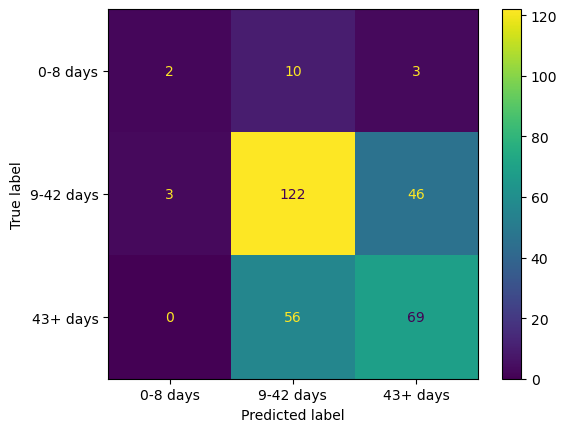

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Make predictions
target_test_pred = classifier.predict(features_test_pca)

# Create confusion matrix
cm = confusion_matrix(target_test, target_test_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0-8 days', '9-42 days', '43+ days'])
cmd.plot()

In [30]:
# compute precision, recall, and f1 score
from sklearn.metrics import classification_report
print(classification_report(target_test, target_test_pred, target_names=['0-8 days', '9-42 days', '43+ days']))

              precision    recall  f1-score   support

    0-8 days       0.40      0.13      0.20        15
   9-42 days       0.65      0.71      0.68       171
    43+ days       0.58      0.55      0.57       125

    accuracy                           0.62       311
   macro avg       0.54      0.47      0.48       311
weighted avg       0.61      0.62      0.61       311



In [46]:
# Fit a Random Forest Classifier to the data
# Create a standard scaler and tranform the data
stand_scale = preprocessing.StandardScaler()
features_train_stand = stand_scale.fit_transform(features_train)
features_test_stand = stand_scale.fit_transform(features_test)

model = RandomForestClassifier(max_features=100, n_estimators=1000)
model.fit(features_train_stand, target_train)

# Return model accuracy when used on the testing data
model.score(features_test_stand, target_test)

0.6527331189710611

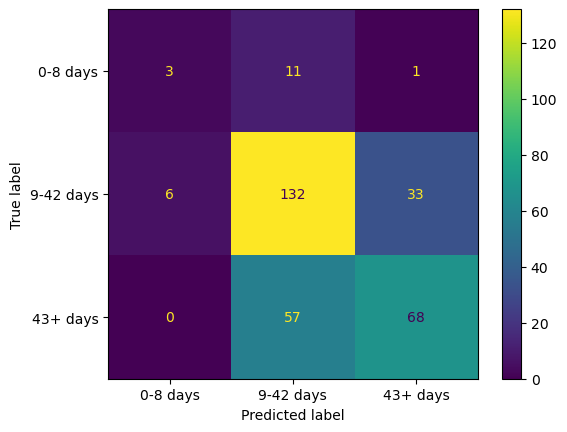

In [48]:
# Make predictions
target_test_pred = model.predict(features_test_stand)

# Create confusion matrix
cm = confusion_matrix(target_test, target_test_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=['0-8 days', '9-42 days', '43+ days'])
cmd.plot()

In [49]:
# compute precision, recall, and f1 score
print(classification_report(target_test, target_test_pred, target_names=['0-8 days', '9-42 days', '43+ days']))

              precision    recall  f1-score   support

    0-8 days       0.33      0.20      0.25        15
   9-42 days       0.66      0.77      0.71       171
    43+ days       0.67      0.54      0.60       125

    accuracy                           0.65       311
   macro avg       0.55      0.51      0.52       311
weighted avg       0.65      0.65      0.64       311



Text(0.5, 0, 'Random Forest Feature Importance')

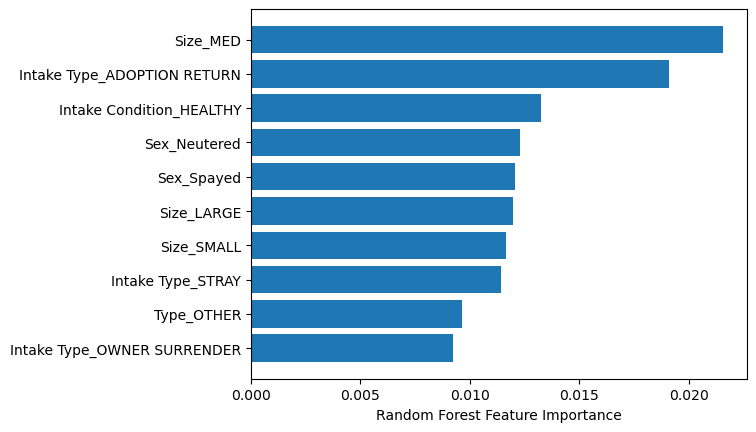

In [56]:
# display the top 10 most important features in the model
sorted_idx = model.feature_importances_.argsort()
sorted_idx = sorted_idx[-10:]
plt.barh(features_train.columns[sorted_idx], model.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")